In [71]:
import numpy as np
import matplotlib.pyplot as plt

from F_R_Tools import MJW, STBS, HUSAW
from F_R_Tools import ModelFR


import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

#Science plots 
# pip install git+https://github.com/garrettj403/SciencePlots

plt.style.use(['science','grid'])


# $f(R)$ Gravity

This notebook is intended to show the functionality of the main F_R_Tools.py classes.

From that classes one can define the main $f(R)$ functions and its derivatives


In [23]:

#Physical constants
from scipy.constants import G 
from scipy.constants import c
from astropy.constants import M_sun
from astropy.cosmology import WMAP9 as cosmo #For the hubble parameter
from scipy.constants import parsec as _pc

_Mpc = 1e+6*_pc
_Gpc = 1e+9*_pc

H0 = cosmo.H(0)
H0 =  H0.value*(1000)/_Mpc # Mpc = 3.0851e22m and 1 km = 1000m 

M_sun = M_sun.value #in Kg
r_sun = 696340*1000 # In meters
R_swarzchild_sun = 2*G*M_sun/c**2
r_c = 10**(5)*(1000)# 1km= 1000m, We opt for 100,000 km as a charateristical unit 
rho_sun = 1.408/1000*100**3  # 1408 kg m ^-3

T_sun = rho_sun*c**2
R_sun = 8*np.pi*G*T_sun/c**4
p_sun = 1.01232*10**(16)
R_ast = H0**2 /c**2
rho_ast = c**2/(8*np.pi*G)*R_ast


In [62]:
def SigmaUnits(sigma,factor, method =1 ):

    """This functions returns the value of the dimensionless 
    coefficients appering in the field Eqs. 
    
    """

    if method == 1:

        rho_sigma = sigma * rho_ast
        R_sigma = 8*np.pi*G/c**2*rho_sigma
        R_tilde = R_ast/R_sigma
        r_sigma = np.sqrt(R_sun/R_sigma)*r_c
    
        T_sigma = rho_sigma*c**2
        alpha = 16*np.pi*G*r_sigma**2*T_sigma/c**4
        beta= r_sigma**2*R_sigma
        
        A =np.array([alpha, beta, R_tilde, T_sigma, T_sun, r_sigma, R_sigma])
        return A
    
    elif method == 2:

        rho_sigma = sigma * rho_ast
        R_c = R_ast
        r_c = np.sqrt(R_c)**(-1)#/mp.mpmathify(1e5*(1e3))
        T_c = rho_sigma*c**2
        
        alpha= 8*np.pi*G*r_c**2*T_c/c**4
        beta= r_c**2*R_c
        R_tilde = factor*R_ast/R_c
        
        A =np.array([alpha, beta, R_tilde, T_c, T_sun, r_c, R_c])
        return A

def F_GR(R):
    """This functions returns f(R)=R"""

    return  R


def F_GR__LAMBDA(R):
    """This functions returns f(R)=R + Lambda"""
    Lambda = 2.08
    return  R - 2*Lambda

EXPONENT = 0 
Zigma = 10**EXPONENT
alpha, beta, R_tilde, T_sigma, T_0, r_sigma, R_sigma = SigmaUnits(Zigma,4.17,method = 2)

alpha,beta,R_tilde,T_sigma, T_0, r_sigma, R_sigma 

(1.0,
 1.0,
 4.17,
 2.7040320830125696e-10,
 1.2654472916614391e+20,
 1.3344819197212814e+26,
 5.6153213105588155e-53)

In [34]:
## Parameters for the  Hu-Sawicki model

c_1 = 1.25e-3 
c_2 = 6.56e-5
n = 4
m2 = 0.24


## Parameters for the  Starobinsky  model
lambda_s= 1
q=2

## Parameters for the  MJW  model
alpha_m = 2
R_tilde_MJW =  1


In [35]:
# Definition of the main functions for the three  models

HUSAW_MODEL = HUSAW(m2, c_1, c_2, n)
STBS_MODEL = STBS(R_tilde,lambda_s,q)
MJW_MODEL =  MJW(1, 2)

# Coefficients 


HUSAW_beta_coef = ModelFR(HUSAW_MODEL,alpha,beta).beta_coef

In [76]:
def plot_f_R_functions():
    
    """
    This functions returns a four part plot for each of the four 
    f(R) models considered in the thesis along with the GR counterpart
    
    """
    R = np.linspace(-1,10,1000)

    fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout = True, figsize=(3.3*2 , 5))

    ax1 = axes[0, 0]
    ax3 = axes[1, 0]
    ax2 = axes[0, 1]
    ax4 = axes[1, 1]


    ax1.plot(R, STBS_MODEL(R)[0],  linewidth=1.2,alpha=0.7,label ='STBS')
    ax1.plot(R, HUSAW_MODEL(R)[0],  linewidth=1.2,alpha=0.7,label ='HUSAW')
    ax1.plot(R[R>0], MJW_MODEL(R[R>0])[0],  linewidth=1.2,alpha=0.7, label ='MJW')
    ax1.plot(R, F_GR(R),linestyle =":",  linewidth=1.2,alpha=0.7,label ='GR')
    ax1.plot(R, F_GR__LAMBDA(R), linestyle =":", linewidth=1.2,alpha=0.7,label ='GR + $\Lambda$')

    ax2.plot(R, STBS_MODEL(R)[1],  linewidth=1.2,alpha=0.7,label ='STBS')
    ax2.plot(R, HUSAW_MODEL(R)[1],  linewidth=1.2,alpha=0.7,label ='HUSAW')
    ax2.plot(R[R>0], MJW_MODEL(R[R>0])[1],  linewidth=1.2,alpha=0.7, label ='MJW')
    ax2.axhline(y=1, linestyle='-.', color = 'black' ,label = 'GR')

    ax3.plot(R, STBS_MODEL(R)[2],  linewidth=1.2,alpha=0.7,label ='STBS')
    ax3.plot(R, HUSAW_MODEL(R)[2],  linewidth=1.2,alpha=0.7,label ='HUSAW')
    ax3.plot(R[R>0], MJW_MODEL(R[R>0])[2],  linewidth=1.2,alpha=0.7, label ='MJW')
    ax3.axhline(y=0, linestyle='-.', color = 'black' ,label = 'GR')


    ax4.plot(R, STBS_MODEL(R)[3],  linewidth=1.2,alpha=0.7,label ='STBS')
    ax4.plot(R, HUSAW_MODEL(R)[3],  linewidth=1.2,alpha=0.7,label ='HUSAW')
    ax4.plot(R[R>0], MJW_MODEL(R[R>0])[3],  linewidth=1.2,alpha=0.7, label ='MJW')
    ax4.axhline(y=0, linestyle='-.', color = 'black' ,label = 'GR')


    ax2.set_ylim(-1.3,2)
    ax2.set_xlim(-1,10)

    ax1.set_xlabel('$R[R_*]$')
    ax1.set_ylabel('$f[R_*]$')
    ax1.legend(fontsize=7)



    ax2.set_xlabel('$R[R_*]$')
    ax2.set_ylabel('$f_{R}[R_*]$')
    ax2.legend(fontsize=7)


    ax3.set_ylim(-1.6,1.6)
    ax3.set_xlabel('$R[R_*]$')
    ax3.set_ylabel('$f_{RR}[R_*]$')
    ax3.legend(fontsize=7)

    ax4.set_xlim(-1,10)
    ax4.set_xlabel('$R[R_*]$')
    ax4.set_ylabel('$f_{RRR}[R_*]$')
    ax4.legend(fontsize=7)


    plt.show()


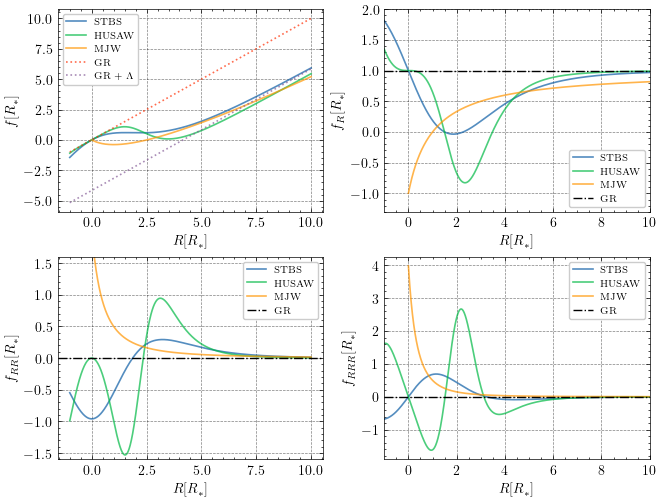

In [77]:
plot_f_R_functions()